**Credit Score – Decision Tree**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import plotly.express as px
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
import pandas as pd

df = pd.read_csv('CREDIT_SCORE_AFSMOTE.csv')

print(df)

      Age  Gender  Income  Education  Marital Status  Number of Children  \
0    25.0       0   50000          1               1                   0   
1    30.0       1  100000          4               0                   2   
2    35.0       0   75000          2               0                   1   
3    40.0       1  125000          3               1                   0   
4    45.0       0  100000          1               0                   0   
..    ...     ...     ...        ...             ...                 ...   
159  29.0       0   27500          3               1                   0   
160  34.0       1   47500          0               1                   0   
161  39.0       0   62500          1               0                   2   
162  44.0       1   87500          4               1                   0   
163  49.0       0   77500          2               0                   1   

     Home Ownership  Credit Score  
0                 1           2.0  
1              

In [ ]:
X = df.drop('Credit Score', axis=1) # Remove the 'target' column from the independent variables
y = df['Credit Score'] # Define the dependent variable (label)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
X_train

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
79,28.0,0,32500,0,1,0,1
39,46.0,0,95000,3,0,1,0
90,36.0,0,57500,1,1,0,1
108,42.0,1,110000,4,1,0,0
159,29.0,0,27500,3,1,0,1
...,...,...,...,...,...,...,...
71,46.0,0,97500,3,0,1,0
106,32.0,1,57500,0,1,0,1
14,36.0,0,70000,1,0,2,0
92,36.0,0,85000,2,0,1,0


In [ ]:
X_test

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
135,25.0,0,55000,1,1,0,1
115,48.0,0,87500,2,0,1,0
131,26.0,0,55000,1,0,1,0
55,39.0,0,62500,1,0,2,0
95,35.0,0,90000,2,0,1,0
...,...,...,...,...,...,...,...
114,43.0,1,95000,4,1,0,0
25,34.0,1,45000,0,1,0,1
23,53.0,1,115000,0,0,0,0
119,39.0,0,62500,1,0,2,0


In [ ]:
y_train

,Credit Score
79,0.0
39,2.0
90,1.0
108,2.0
159,0.0
...,...
71,2.0
106,1.0
14,2.0
92,2.0


In [ ]:
y_test

,Credit Score
135,1.0
115,2.0
131,1.0
55,2.0
95,2.0
...,...
114,2.0
25,1.0
23,2.0
119,2.0


In [ ]:
# Create data for the chart
chart_data = pd.DataFrame({
    'Dataset': ['X_train', 'X_test', 'y_train', 'y_test'],
    'Size': [len(X_train), len(X_test), len(y_train), len(y_test)]
})

# Plot bar chart
fig = px.bar(
    chart_data,
    x='Dataset',
    y='Size',
    text='Size',
    title='Training and Testing Set Sizes',
    color='Dataset'
)

fig.update_traces(textposition='outside')
fig.show()

In [ ]:
# Function to plot a Series (value frequency)
def plot_bars_series(series, title):
    df_plot = series.value_counts().reset_index()
    df_plot.columns = ['Value', 'Count']

    fig = px.bar(
        df_plot,
        x='Value',
        y='Count',
        text='Count',
        title=title,
        color='Value'
    )
    fig.update_traces(textposition='outside')
    fig.show()

# Call the function for y_train and y_test only
plot_bars_series(y_train, "y_train - Value Frequencies")
plot_bars_series(y_test, "y_test - Value Frequencies")

The split of X_train, X_test, y_train, and y_test is correct.

However, the values of my target variable are not balanced.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore_score = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_score.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
print(arvore_score.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


In [ ]:
previsoes = arvore_score.predict(X_train[:10])
previsoes

array([0., 2., 1., 2., 0., 2., 0., 2., 1., 0.])

In [ ]:
y_train

,Credit Score
79,0.0
39,2.0
90,1.0
108,2.0
159,0.0
...,...
71,2.0
106,1.0
14,2.0
92,2.0


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

previsoes = arvore_score.predict(X_train)
acuracia = accuracy_score(y_train, previsoes)
print("Acurácia:", acuracia)

Acurácia: 1.0


Perfect accuracy – possibly an example of overfitting.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

previsoes2 = arvore_score.predict(X_test)
acuracia = accuracy_score(y_test, previsoes)
print("Acurácia:", acuracia)

Acurácia: 0.5609756097560976


Test accuracy is 56%, which does not rule out possible overfitting (training accuracy = 1). The model still performs at a reasonably efficient level, but it is not satisfactory.

In [ ]:
relatorio = classification_report(y_test, previsoes)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         9
         1.0       0.32      0.35      0.33        17
         2.0       0.70      0.71      0.71        56

    accuracy                           0.56        82
   macro avg       0.34      0.36      0.35        82
weighted avg       0.54      0.56      0.55        82



Class 0 (0.0): Precision is 0% — no correct predictions.

Class 1 (1.0): Precision is 32% — very low accuracy, indicating that less than half of the samples predicted as class 1 actually belong to class 1.

Class 2 (2.0): Precision is 70% — good precision, showing that more than half of the samples predicted as class 2 actually belong to class 2.

Class 0 (0.0): Recall is 0%, indicating that the model correctly identified no samples.

Class 1 (1.0): Recall is 35%, indicating that the model correctly identified 35% of the class 1 samples.

Class 2 (2.0): Recall is 71%, indicating that the model correctly identified 71% of the class 2 samples.

The overall accuracy of the model is 56%, meaning that 56% of all the model’s predictions are correct. The weighted F1-Score was 55%; I do not consider this model’s predictions satisfactory… It could be improved.

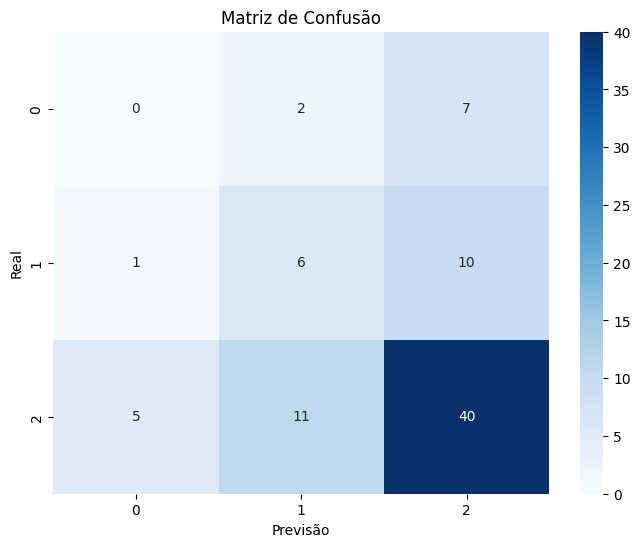

In [ ]:
matriz_confusao = confusion_matrix(y_test, previsoes)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    matriz_confusao,
    annot=True,
    cmap='Blues',
    fmt='d',
    xticklabels=['0', '1', '2'],
    yticklabels=['0', '1', '2']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Insight: The model predicted users with high Credit Scores (2.0) very well; however, for moderate (1.0) and low (0.0) scores—those more likely to indicate default—it did not show satisfactory performance.

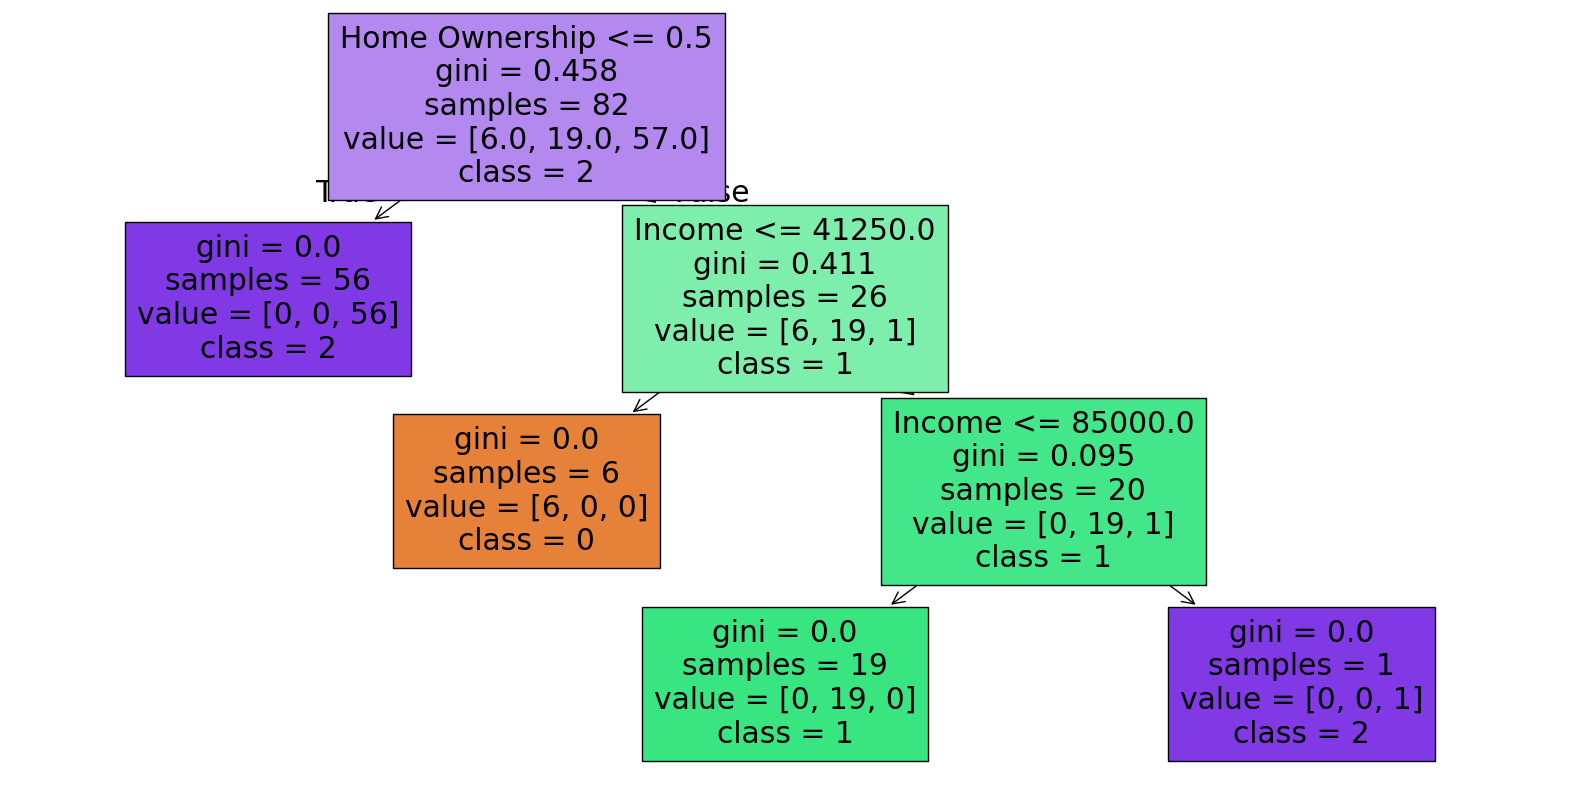

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(arvore_score, filled=True, feature_names=X_train.columns, class_names=['0', '1','2'])
plt.show()

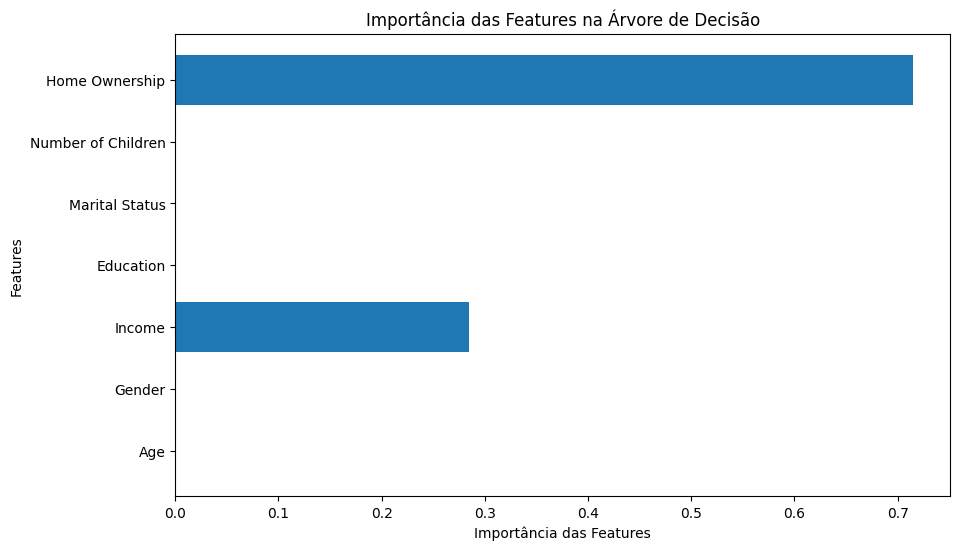

In [ ]:
# Getting feature importances from the decision tree model
importances_features = arvore_score.feature_importances_

# Getting feature names
feature_names = X_train.columns

# Creating a horizontal bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in the Decision Tree')
plt.show()

# Decision Tree using only the 2 most important features.

In [ ]:
X_train_reduzido = X_train[['Home Ownership', 'Income']]
X_test_reduzido = X_test[['Home Ownership', 'Income']]

In [ ]:
arvore_score_reduzido = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_score_reduzido.fit(X_train_reduzido, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
previsoes_reduzido = arvore_score_reduzido.predict(X_test_reduzido)

In [ ]:
relatorio = classification_report(y_test, previsoes_reduzido)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95         9
         1.0       0.88      0.82      0.85        17
         2.0       0.96      0.96      0.96        56

    accuracy                           0.94        82
   macro avg       0.91      0.93      0.92        82
weighted avg       0.94      0.94      0.94        82



O ChatGPT disse:
Insight: Yes, the model is much better! All parameters for predicting all SCORE classes (0, 1, 2) are above 80% accuracy.

Naive Bayes:

Test accuracy: 0.9634

Test recall (macro): 0.9548

Decision Tree:

Accuracy: 0.94

Weighted average F1-score: 0.94

Both models perform very similarly, but in this case, Naive Bayes shows slightly higher accuracy in decimal points.








